### Instructions for Running the Script

1. **Install Dependencies**  
   Ensure the following Python libraries are installed:  
   - `numpy`  
   - `tensorflow`  
   - `matplotlib`  
   - `pandas`  
   - `scikit-learn`  
   - `Pillow`  
   Use the following command to install any missing libraries:  

   pip install numpy tensorflow matplotlib pandas scikit-learn Pillow

2. Prepare the Dataset
You need the AffectNet dataset, including:

A folder of images (e.g., /path/to/images/).
A folder of corresponding annotation files (e.g., /path/to/annotations/), where each annotation file follows the naming format imageID_exp.npy.
Set the File Paths
Update the images_folder and annotations_folder variables in the code with the correct paths to your dataset:

images_folder = "/path/to/images"
annotations_folder = "/path/to/annotations"

Adjust Processing Limit (Optional)
By default, the script processes up to 20,000 images. To modify this, update the max_datapoints variable:


max_datapoints = 20000
Customize Preprocessing (Optional)

The script preprocesses images by:

Resizing to 244x244 pixels. Adjust this by modifying:
python

img = img.resize((244, 244))
Converting to Grayscale. To keep the images in color, remove .convert("L"):
python


img = Image.open(image_path).convert("L")


Execute the script in your preferred Python environment (e.g., Jupyter Notebook, VSCode, or terminal):
python Main.py
Check Output
After processing, the script prints:

The shape of the processed images and labels arrays.
The unique emotion labels found in the dataset.
Dataset Structure

Ensure your dataset is organized as follows:

/path/to/images/
    1.jpg
    2.jpg
    ...
/path/to/annotations/
    1_exp.npy
    2_exp.npy
    ...
Error Handling
The script handles missing or corrupted annotation files, invalid emotion values, and unreadable images. Files with issues are logged, and the script continues processing the remaining files.

Modify as Needed
Adjust dataset size, preprocessing steps, or other parameters in the code to suit your requirements.
"""








In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
import os
import numpy as np
from PIL import Image

# Define paths
images_folder = "/Users/prishasrivastava/Desktop/train_set/images" 
annotations_folder = "/Users/prishasrivastava/Desktop/train_set/annotations" 

# Initialize lists to store images and labels
images = []
labels = []

# Set the limit for the number of datapoints to process
max_datapoints = 20000
count = 0

# Loop through each file in the images folder
for filename in os.listdir(images_folder):
    if filename.endswith(".jpg"):
        # Extract the base name (e.g., "1" from "1.jpeg")
        base_name = os.path.splitext(filename)[0]
        # Load the corresponding annotation file for emotion
        emotion_file = os.path.join(annotations_folder, f"{base_name}_exp.npy")

        if os.path.exists(emotion_file):
            try:
                emotion = np.load(emotion_file).item()  # Load the emotion value
                emotion = int(emotion)  # Ensure it's an integer

                # Check valid emotion range (e.g., AffectNet range is 0-7)
                if emotion < 0 or emotion > 7:
                    print(f"Skipping {filename}: emotion value out of range ({emotion})")
                    continue
            except Exception as e:
                print(f"Error reading {emotion_file}: {e}")
                continue
            
            # Load and preprocess the image
            image_path = os.path.join(images_folder, filename)
            try:
                img = Image.open(image_path).convert("L") # Open and convert to grayscale
                img = img.resize((244, 244)) # Resize the image (adjust as needed)
                img_array = np.array(img) # Convert to NumPy array (but don't flatten)
                
                # Append image and label to separate lists
                images.append(img_array) 
                labels.append(emotion)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                continue

            count += 1
            if count >= max_datapoints:
                break

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print("Data extraction and preprocessing complete.")
print(f"Images shape: {images.shape}") 
print(f"Labels shape: {labels.shape}") 


Data extraction and preprocessing complete.
Images shape: (20000, 244, 244)
Labels shape: (20000,)


In [3]:
unique_labels = np.unique(labels)
print("Unique emotion labels:", unique_labels)

Unique emotion labels: [0 1 2 3 4 5 6 7]


In [4]:
#Classify label value to expression
label_to_text = {0:'Neutral', 1:'Happiness', 2:'Sadness', 3:'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7:' Contempt'}

In [5]:
print("Original images shape:", images.shape)


Original images shape: (20000, 244, 244)


In [6]:
import tensorflow as tf
import numpy as np

# Assuming 'images' is your NumPy array of shape (3498, 244, 244)
# Add a channel dimension to make the shape (3498, 244, 244, 1)
images = np.expand_dims(images, axis=-1)

# Now resize the images to (224, 224, 1)
resized_images = tf.image.resize(images, (224, 224))

# Convert to NumPy array if needed
resized_images = resized_images.numpy()

print("Resized images shape:", resized_images.shape)  # Should be (3498, 224, 224, 1)


Resized images shape: (20000, 224, 224, 1)


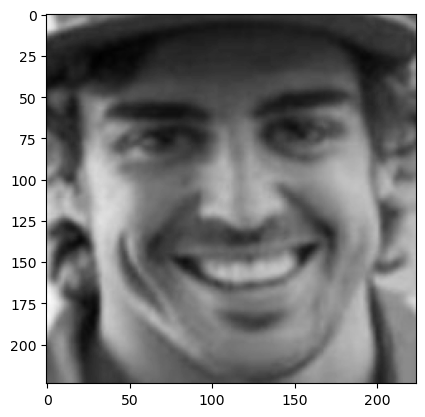

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# ... (previous code where 'images' is loaded) ...

# Select the image you want to display (e.g., the first image)
image_to_display = images[0]

# Resize using OpenCV
resized_image = cv2.resize(image_to_display, (224, 224))

# Display the image using Matplotlib
plt.imshow(resized_image, cmap='gray')
plt.show()

In [8]:
resized_image.shape

(224, 224)

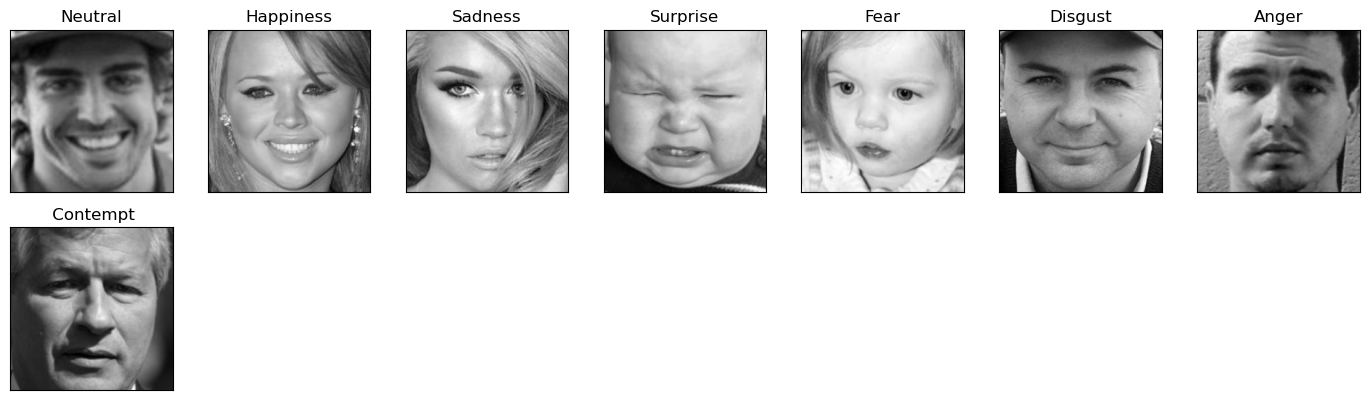

In [9]:
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd

# Assuming 'resized_images' and 'labels' are defined from your previous code
fig = pyplot.figure(1, (14, 14))
k = 0

# Create a DataFrame for easier access
data = {'pixels': [], 'emotion': []}
for i in range(len(resized_images)):
    data['pixels'].append(' '.join(map(str, resized_images[i].flatten())))  # Flatten image array into a string
    data['emotion'].append(labels[i])  # Corresponding emotion label
df = pd.DataFrame(data)

# Define unique labels for the emotions
unique_labels = sorted(df.emotion.unique())  # Sorting labels

for label in unique_labels:  # Iterate over each unique emotion label
    for j in range(1):  # Show 3 images per emotion (adjust as needed)
        if k >= len(resized_images):  # Avoid index out of range error
            break
        try:
            # Get the image corresponding to the current label
            px = resized_images[k]
            k += 1
            ax = pyplot.subplot(7, 7, k)  # Adjust the grid size as needed (7x7 here for up to 21 images)
            ax.imshow(px, cmap='gray')  # Display in grayscale (or use cmap='viridis' for color)
            ax.set_xticks([])  # Hide x-axis ticks
            ax.set_yticks([])  # Hide y-axis ticks
            ax.set_title(label_to_text[label])  # Use your label_to_text mapping to show label
            pyplot.tight_layout()
        except IndexError:
            print("IndexError: Index out of bounds")
            break  # Exit loop if index exceeds bounds

# Show the images in a grid layout
pyplot.show()


In [10]:
import pandas as pd
import numpy as np
#Parse and shape entire dataframe
# Parse and reshape entire dataframe to (224, 224, 1)
resized_image = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(224, 224, 1).astype('float32'))  # (224, 224, 1)
resized_image = np.stack(resized_image, axis=0)  # Stack all the images into a single numpy array
resized_image.shape  # This should now be (3498, 224, 224, 1)



(20000, 224, 224, 1)

In [11]:
labels=df.emotion.values

: 

In [ ]:
#Split dataset into training and testing - Correct Order
X_train, X_test, y_train, y_test = train_test_split(resized_image, labels, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape # uncomment if you want to check the shapes again.

In [23]:
X_train= X_train/255 #normalize from [1,0]
X_test=X_test/255

In [24]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [25]:
basemodel = tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (224,224,1)), 
       tf.keras.layers.MaxPool2D(2,2),
       tf.keras.layers.Dropout(0.25),  # Dropout after the first MaxPool2D
       tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
       tf.keras.layers.MaxPool2D(2,2),
       tf.keras.layers.Dropout(0.25),  # Dropout after the second MaxPool2D
       tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
       tf.keras.layers.MaxPool2D(2,2),
       tf.keras.layers.Dropout(0.25),   # Dropout after the third MaxPool2D
       tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
       tf.keras.layers.MaxPool2D(2,2),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # L2 regularization
       tf.keras.layers.Dense(8,activation = 'softmax')
   ])

In [26]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [27]:

print("Labels are already integer-encoded.")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Compile the model
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',  # For integer-encoded labels
                  metrics=['accuracy'])


Labels are already integer-encoded.
y_train shape: (18000,), y_test shape: (2000,)


In [28]:
#stop saving model when validation accuracy stops improving
try:
  os.mkdir('checkpoint')
except:
  pass


In [31]:
file_name = 'best_model.keras' #Change file extension to .keras
checkpoint_path= os.path.join('checkpoint',file_name)

#Call back code takes callback model checkpoint, takes path of file, monitors validation accuracy,
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_accuracy',
                                                 verbose=1, #how much print you see on screen
                                                 save_freq='epoch',
                                                 save_best_only=True, #don't save all models
                                                 save_weights_only=False, #completely save model
                                                 mode='max') #maximize validation accuracy, if you want to minimize validation loss, write min instead

In [32]:
history=basemodel.fit(X_train,y_train,epochs=10,validation_split=0.1, callbacks=[call_back])

Epoch 1/10


2024-12-15 17:56:59.693455: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


507/507 [==============================] - ETA: 0s - loss: 1.6906 - accuracy: 0.4841
Epoch 1: val_accuracy improved from -inf to 0.54222, saving model to checkpoint/best_model.keras
507/507 [==============================] - 848s 2s/step - loss: 1.6906 - accuracy: 0.4841 - val_loss: 1.7224 - val_accuracy: 0.5422
Epoch 2/10
507/507 [==============================] - ETA: 0s - loss: 1.3263 - accuracy: 0.5696
Epoch 2: val_accuracy improved from 0.54222 to 0.57833, saving model to checkpoint/best_model.keras
507/507 [==============================] - 1219s 2s/step - loss: 1.3263 - accuracy: 0.5696 - val_loss: 1.4412 - val_accuracy: 0.5783
Epoch 3/10
507/507 [==============================] - ETA: 0s - loss: 1.2270 - accuracy: 0.5962
Epoch 3: val_accuracy improved from 0.57833 to 0.58833, saving model to checkpoint/best_model.keras
507/507 [==============================] - 1298s 3s/step - loss: 1.2270 - accuracy: 0.5962 - val_loss: 1.3609 - val_accuracy: 0.5883
Epoch 4/10
507/507 [========

In [ ]:
# prompt: create val/training loss chart

import matplotlib.pyplot as plt

# Assuming 'history' is the output of your model.fit call
# history = basemodel.fit(...)

# Access the training and validation loss from the history object
training_loss = basemodel.history.history['loss']
validation_loss = basemodel.history.history['val_loss']

# Create the plot
epochs = range(1, len(training_loss) + 1)  # Assuming you have loss values for each epoch
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

63/63 [==============================] - 24s 379ms/step


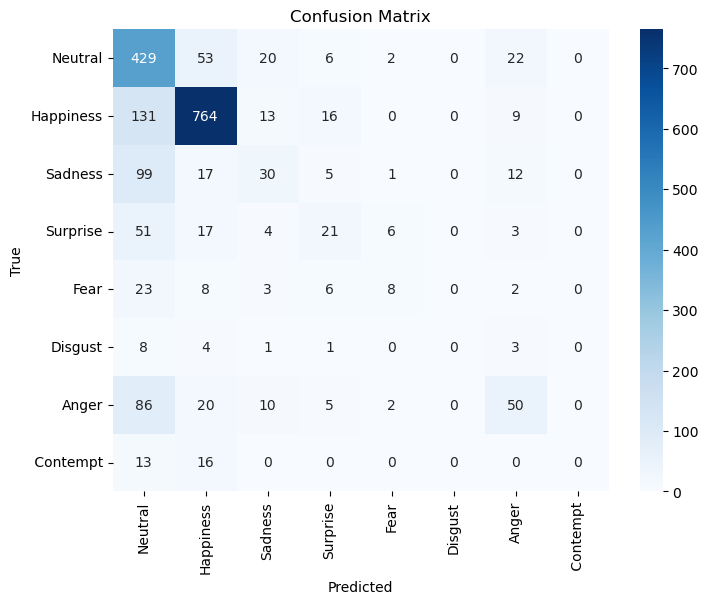

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions on the test set using the trained model
y_pred = np.argmax(basemodel.predict(X_test), axis=1)  # Get predicted class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(label_to_text.values()), 
            yticklabels=list(label_to_text.values()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [36]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined from your previous code
print(classification_report(y_test, y_pred, target_names=list(label_to_text.values())))

              precision    recall  f1-score   support

     Neutral       0.63      0.56      0.59       532
   Happiness       0.79      0.89      0.84       933
     Sadness       0.28      0.44      0.34       164
    Surprise       0.37      0.26      0.31       102
        Fear       0.86      0.12      0.21        50
     Disgust       0.00      0.00      0.00        17
       Anger       0.41      0.36      0.38       173
    Contempt       0.50      0.03      0.06        29

    accuracy                           0.65      2000
   macro avg       0.48      0.33      0.34      2000
weighted avg       0.64      0.65      0.63      2000



/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
